In [32]:
import csv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data = pd.read_csv('/content/data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
x = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = data['diagnosis']

In [6]:
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [7]:
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [8]:
y = y.map({"M": 1, "B": 0})
y.unique()

array([1, 0])

In [16]:
x_values = x.values
y_values = y.values

In [10]:
def min_max_scale(x):
  x_scaled = np.zeros_like(x, dtype=float)
  for j in range(x.shape[1]):
    col = x[:, j]
    col_min = col.min()
    col_max = col.max()

    x_scaled[:, j] = (col - col_min) / (col_max - col_min)

  return x_scaled

In [18]:
x_scaled = min_max_scale(x_values)

In [17]:
print(x_values[0][:5]); print(x_scaled[0][:5])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
[0.52103744 0.0226581  0.54598853 0.36373277 0.59375282]


In [21]:
indices = np.arange(len(x_scaled))
np.random.shuffle(indices)
x_shuffled = x_scaled[indices]
y_shuffled = y_values[indices]

In [23]:
split = int(0.8*len(x_shuffled))

x_train = x_shuffled[:split]; x_test = x_shuffled[split:]
y_train = y_shuffled[:split]; y_test = y_shuffled[split:]

In [25]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [26]:
def euclidean(a, b):
  return np.sqrt(np.sum((a-b)**2))

In [27]:
def manhattan(a, b):
  return np.sum(np.abs(a-b))

In [45]:
def minkowski(a, b, p = 3):
  return np.sum(np.abs(a-b)**p)**(1/p)

In [29]:
def cosine(a, b):
  return 1 - (np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)))

In [30]:
def hamming(a, b):
  return np.sum(a != b)

In [44]:
def get_distance(a, b, metric):
  if metric == "euclidean":
    return euclidean(a, b)
  elif metric == "manhattan":
    return manhattan(a, b)
  elif metric == "minkowski":
    return minkowski(a, b)
  elif metric == "cosine":
    return cosine(a, b)
  elif metric == "hamming":
    return hamming(a, b)

In [34]:
def knn_pred_one(x, x_train, y_train, k, metric):
  distances = []
  for i in range(len(x_train)):
    dis = get_distance(x, x_train[i], metric)
    distances.append((dis, y_train[i]))

  distances.sort(key=lambda x : x[0])
  nbd = distances[:k]

  labels = [label for _, label in nbd]
  return Counter(labels).most_common(1)[0][0]

def knn_pred(x_test, x_train, y_train, k, metric):
  pred = []
  for x in x_test:
    pred.append(knn_pred_one(x, x_train, y_train, k, metric))

  return np.array(pred)

In [38]:
pred = knn_pred(x_test, x_train, y_train, 5, "euclidean")
print(pred); print(y_test)

[1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1
 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1
 0 0 1]
[1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1
 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0
 0 0 1]


In [39]:
def accuracy(y_t, y_p):
  return np.sum(y_t == y_p) / len(y_t)

def conf_mat(y_t, y_p):
  tp = tn = fp = fn = 0
  for i in range(len(y_t)):
    if y_t[i] == 1 and y_p[i] == 1:
      tp += 1
    elif y_t[i] == 0 and y_p[i] == 0:
      tn += 1
    elif y_t[i] == 1 and y_p[i] == 0:
      fn += 1
    elif y_t[i] == 0 and y_p[i] == 1:
      fp += 1
  return tp, fp, fn, tn

def prec_recall(tp, fp, fn):
  prec = tp / (tp + fp) if tp + fp != 0 else 0
  recall = tp / (tp + fn) if tp + fn != 0 else 0
  return prec, recall

In [41]:
y_pred = knn_pred(x_test, x_train, y_train, 5, "euclidean")
acc = accuracy(y_test, y_pred)
tp, fp, fn, tn = conf_mat(y_test, y_pred)
prec, recall = prec_recall(tp, fp, fn)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", recall)

Accuracy:  0.9649122807017544
Precision:  0.9347826086956522
Recall:  0.9772727272727273


In [47]:
ks = [3, 4, 9, 20, 47]
metrics = ["euclidean", "manhattan", "minkowski", "cosine", "hamming"]

results = {m: [] for m in metrics}

for m in metrics:
  print("\nMetric: ", m)
  for k in ks:
    y_pred = knn_pred(x_test, x_train, y_train, k, m)
    acc = accuracy(y_test, y_pred)
    results[m].append(acc)
    print(f"K = {k} | Accuracy = {acc}")


Metric:  euclidean
K = 3 | Accuracy = 0.9736842105263158
K = 4 | Accuracy = 0.9824561403508771
K = 9 | Accuracy = 0.9736842105263158
K = 20 | Accuracy = 0.9649122807017544
K = 47 | Accuracy = 0.956140350877193

Metric:  manhattan
K = 3 | Accuracy = 0.9824561403508771
K = 4 | Accuracy = 0.9824561403508771
K = 9 | Accuracy = 0.9736842105263158
K = 20 | Accuracy = 0.956140350877193
K = 47 | Accuracy = 0.956140350877193

Metric:  minkowski
K = 3 | Accuracy = 0.9736842105263158
K = 4 | Accuracy = 0.9649122807017544
K = 9 | Accuracy = 0.9649122807017544
K = 20 | Accuracy = 0.9649122807017544
K = 47 | Accuracy = 0.9385964912280702

Metric:  cosine
K = 3 | Accuracy = 0.8771929824561403
K = 4 | Accuracy = 0.9035087719298246
K = 9 | Accuracy = 0.9035087719298246
K = 20 | Accuracy = 0.8947368421052632
K = 47 | Accuracy = 0.9035087719298246

Metric:  hamming
K = 3 | Accuracy = 0.7017543859649122
K = 4 | Accuracy = 0.7280701754385965
K = 9 | Accuracy = 0.7456140350877193
K = 20 | Accuracy = 0.6754

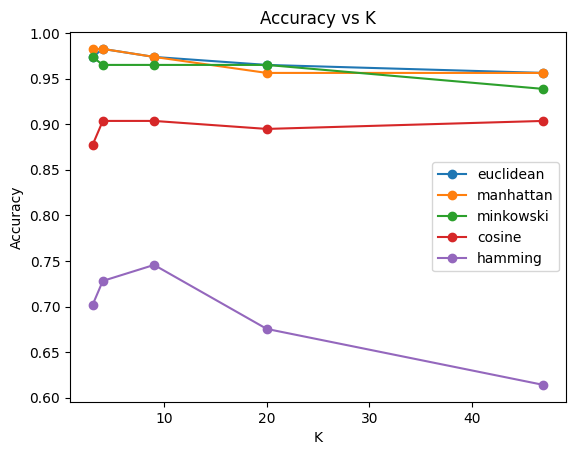

In [49]:
for m in metrics:
  plt.plot(ks, results[m], marker='o', label = m)

plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.legend()
plt.show()

In [56]:
"""
Clearly from the above plot we can see that the best K and metric(s) / distance matrix(s) are:
Euclidean with K = 4 and
Manhattan with K =3 and 4.
AND WE WILL BE GETTING EXACTLYSAME VALUES FOR ALL THE THREE GEOMETRIES (MODELS).
"""
print("For Euclidean and K = 4")
y_pred = knn_pred(x_test, x_train, y_train, 4, "euclidean")
acc = accuracy(y_test, y_pred)
tp, fp, fn, tn = conf_mat(y_test, y_pred)
prec, recall = prec_recall(tp, fp, fn)
print("Accuracy: ", acc)
print("Confusion Matrix: ")
print("TP: ", tp, "FP: ", fp)
print("FN: ", fn, "TN: ", tn)
print("Precision: ", prec)
print("Recall: ", recall)

print("\nFor Manhattan and K = 3")
y_pred = knn_pred(x_test, x_train, y_train, 3, "manhattan")
acc = accuracy(y_test, y_pred)
tp, fp, fn, tn = conf_mat(y_test, y_pred)
prec, recall = prec_recall(tp, fp, fn)
print("Accuracy: ", acc)
print("Confusion Matrix: ")
print("TP: ", tp, "FP: ", fp)
print("FN: ", fn, "TN: ", tn)
print("Precision: ", prec)
print("Recall: ", recall)

print("\nFor Manhattan and K = 4")
y_pred = knn_pred(x_test, x_train, y_train, 4, "manhattan")
acc = accuracy(y_test, y_pred)
tp, fp, fn, tn = conf_mat(y_test, y_pred)
prec, recall = prec_recall(tp, fp, fn)
print("Accuracy: ", acc)
print("Confusion Matrix: ")
print("TP: ", tp, "FP: ", fp)
print("FN: ", fn, "TN: ", tn)
print("Precision: ", prec)
print("Recall: ", recall)

For Euclidean and K = 4
Accuracy:  0.9824561403508771
Confusion Matrix: 
TP:  43 FP:  1
FN:  1 TN:  69
Precision:  0.9772727272727273
Recall:  0.9772727272727273

For Manhattan and K = 3
Accuracy:  0.9824561403508771
Confusion Matrix: 
TP:  43 FP:  1
FN:  1 TN:  69
Precision:  0.9772727272727273
Recall:  0.9772727272727273

For Manhattan and K = 4
Accuracy:  0.9824561403508771
Confusion Matrix: 
TP:  43 FP:  1
FN:  1 TN:  69
Precision:  0.9772727272727273
Recall:  0.9772727272727273
